In [206]:
import torch
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [207]:
X, y = make_classification(n_samples = 10000, n_features = 2, n_classes = 2, n_redundant = 0, n_repeated = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

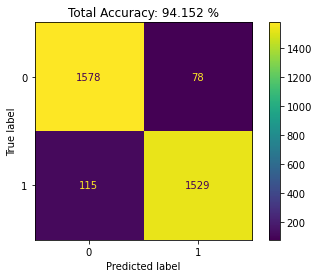

In [208]:
# estimate a logistic regression model 
base_LR = LogisticRegression(random_state = 42)
base_LR.fit(X_train, y_train)
pred = base_LR.predict(X_test)
acc = np.sum(pred == y_test) / y_test.shape[0]
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f'Total Accuracy: {100 * round(acc,5)} %')
plt.show()

(-4.0, 4.0)

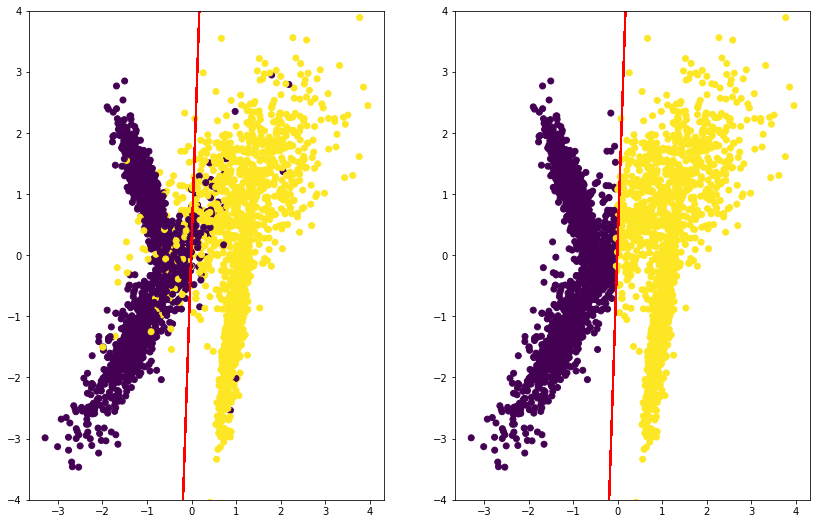

In [209]:
decision_boundary = base_LR.intercept_- base_LR.coef_[0][0] / base_LR.coef_[0][1] * X_test[:,0]

fig = plt.figure(figsize =(14, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(X_test[:,0], X_test[:,1], c = y_test)
ax2.scatter(X_test[:,0], X_test[:,1], c = pred)
ax1.plot(X_test[:,0],decision_boundary, c = 'red')
ax2.plot(X_test[:,0],decision_boundary, c = 'red')
ax1.set_ylim(-4, 4)
ax2.set_ylim(-4, 4)

In [218]:
## define logistic regression as per https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be
class NNLogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NNLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

class smallNN(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(smallNN, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 3)
        self.linear2 = torch.nn.Linear(3,4)
        self.linear3 = torch.nn.Linear(4, output_dim)

    def forward(self, x):
        pass1 = self.linear(x)
        pass2 = torch.relu(self.linear2(pass1))
        pass3 = self.linear3(pass2)
        outputs = torch.sigmoid(pass3)
        return outputs

In [219]:
# setup for training
epochs = 10000
input_dim = 2
output_dim = 1
learning_rate = 0.005

# our model
NN_LR = smallNN(input_dim, output_dim)#NNLogisticRegression(input_dim, output_dim)

# additional reqs
criterion = torch.nn.BCELoss() # loss criterion
optimizer = torch.optim.SGD(NN_LR.parameters(), lr=learning_rate)

# convert data to torch tensors
X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)

In [220]:
# copied from https://towardsdatascience.com/logistic-regression-with-pytorch-3c8bbea594be
losses = []
losses_test = []
Iterations = []
iter = 0
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = NN_LR(X_train)
    loss = criterion(torch.squeeze(outputs), labels) 
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. the weights/bias
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%1000==0:
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(NN_LR(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:   0%|          | 0/10000 [00:00<?, ?it/s]


RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

(-4.0, 4.0)

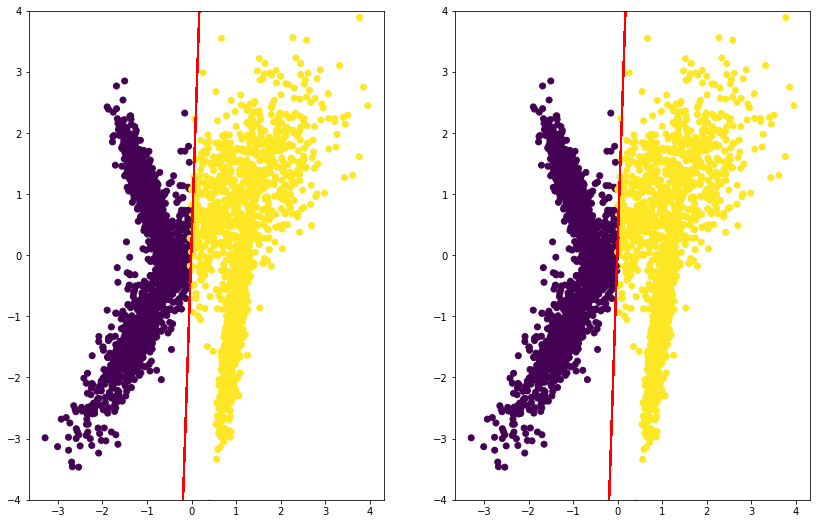

In [217]:
NN_pred = NN_LR(X_test).round().detach().numpy()
fig = plt.figure(figsize =(14, 9))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# ax3 = fig.add_subplot(122)

ax1.scatter(X_test[:,0], X_test[:,1], c = pred)
ax2.scatter(X_test[:,0], X_test[:,1], c = NN_pred)
ax1.plot(X_test[:,0],decision_boundary, c = 'red')
ax2.plot(X_test[:,0],decision_boundary, c = 'red')
ax1.set_ylim(-4, 4)
ax2.set_ylim(-4, 4)

In [117]:
torch.sigmoid(torch.tensor([[5,6],[7, 7],[8,9]]))

tensor([[0.9933, 0.9975],
        [0.9991, 0.9991],
        [0.9997, 0.9999]])